# Overlaying Speed Traces of Two Drivers
---

In [2]:
import sys
import fastf1
import fastf1.plotting
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

sys.path.append("../..")
from common import Config

In [38]:
fastf1.plotting.setup_mpl()
fastf1.Cache.enable_cache(Config.FASTF1_CACHE_DIR)
fastf1.set_log_level('WARNING')

## Loading Drivers Data

In [39]:
session = fastf1.get_session(2024, 'Bahrain', 'Q')
session.load()
circuit_info = session.get_circuit_info()

In [5]:
# Getting the fastest lap telemetry data
lap = session.laps.pick_fastest()
tel = lap.get_telemetry()

In [24]:
# ver_lap = session.laps.pick_driver('VER').pick_fastest()
# lec_lap = session.laps.pick_driver('LEC').pick_fastest()
# ham_lap = session.laps.pick_driver('HAM').pick_fastest()

drivers_list = ['VER', 'LEC', 'HAM']

lap_dict = dict()
for driver in drivers_list:
    lap_dict[driver] = session.laps.pick_driver(driver).pick_fastest()

In [17]:
# Loading telemetry data
# ver_tel = ver_lap.get_car_data().add_distance()
# lec_tel = lec_lap.get_car_data().add_distance()
# ham_tel = ham_lap.get_car_data().add_distance()

tel_df = dict()
for driver in drivers_list:
    tel_df[driver] = lap_dict[driver].get_car_data().add_distance()

In [18]:
tel_df[drivers_list[0]]

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2024-03-01 16:59:09.889,10674,298,8,100,False,12,car,0 days 00:00:00.091000,0 days 01:12:34.216000,7.532778
1,2024-03-01 16:59:10.049,10757,301,8,100,False,12,car,0 days 00:00:00.251000,0 days 01:12:34.376000,20.910556
2,2024-03-01 16:59:10.330,10858,302,8,100,False,12,car,0 days 00:00:00.532000,0 days 01:12:34.657000,44.483333
3,2024-03-01 16:59:10.610,10987,307,8,100,False,12,car,0 days 00:00:00.812000,0 days 01:12:34.937000,68.361111
4,2024-03-01 16:59:10.970,11049,310,8,100,False,12,car,0 days 00:00:01.172000,0 days 01:12:35.297000,99.361111
...,...,...,...,...,...,...,...,...,...,...,...
340,2024-03-01 17:00:37.730,11095,274,7,100,False,12,car,0 days 00:01:27.932000,0 days 01:14:02.057000,5266.800000
341,2024-03-01 17:00:37.890,11092,279,7,100,False,12,car,0 days 00:01:28.092000,0 days 01:14:02.217000,5279.200000
342,2024-03-01 17:00:38.090,11180,282,7,100,False,12,car,0 days 00:01:28.292000,0 days 01:14:02.417000,5294.866667
343,2024-03-01 17:00:38.370,11293,286,7,100,False,12,car,0 days 00:01:28.572000,0 days 01:14:02.697000,5317.111111


## Plotting Drivers

In [66]:
# # Getting colours for plotting
# rbr_colour = fastf1.plotting.team_color('RBR')
# fer_colour = fastf1.plotting.team_color('FER')
# mer_colour = fastf1.plotting.team_color('MER')

# colour_dict = dict()
# for team in fastf1.plotting.TEAM_TRANSLATE.values():
#     colour_dict[team] = fastf1.plotting.team_color(team)

driver_team_mapping = {v['Abbreviation']: v['TeamName'].lower() for _, v in fastf1._DRIVER_TEAM_MAPPING.items()}
driver_colour_mapping = {k: fastf1.plotting.DRIVER_COLORS[v] for k, v in fastf1.plotting.DRIVER_TRANSLATE.items()}

Text(0.5, 0.98, 'FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2024 (Qualifying)\n2024-03-01 19:00:00')

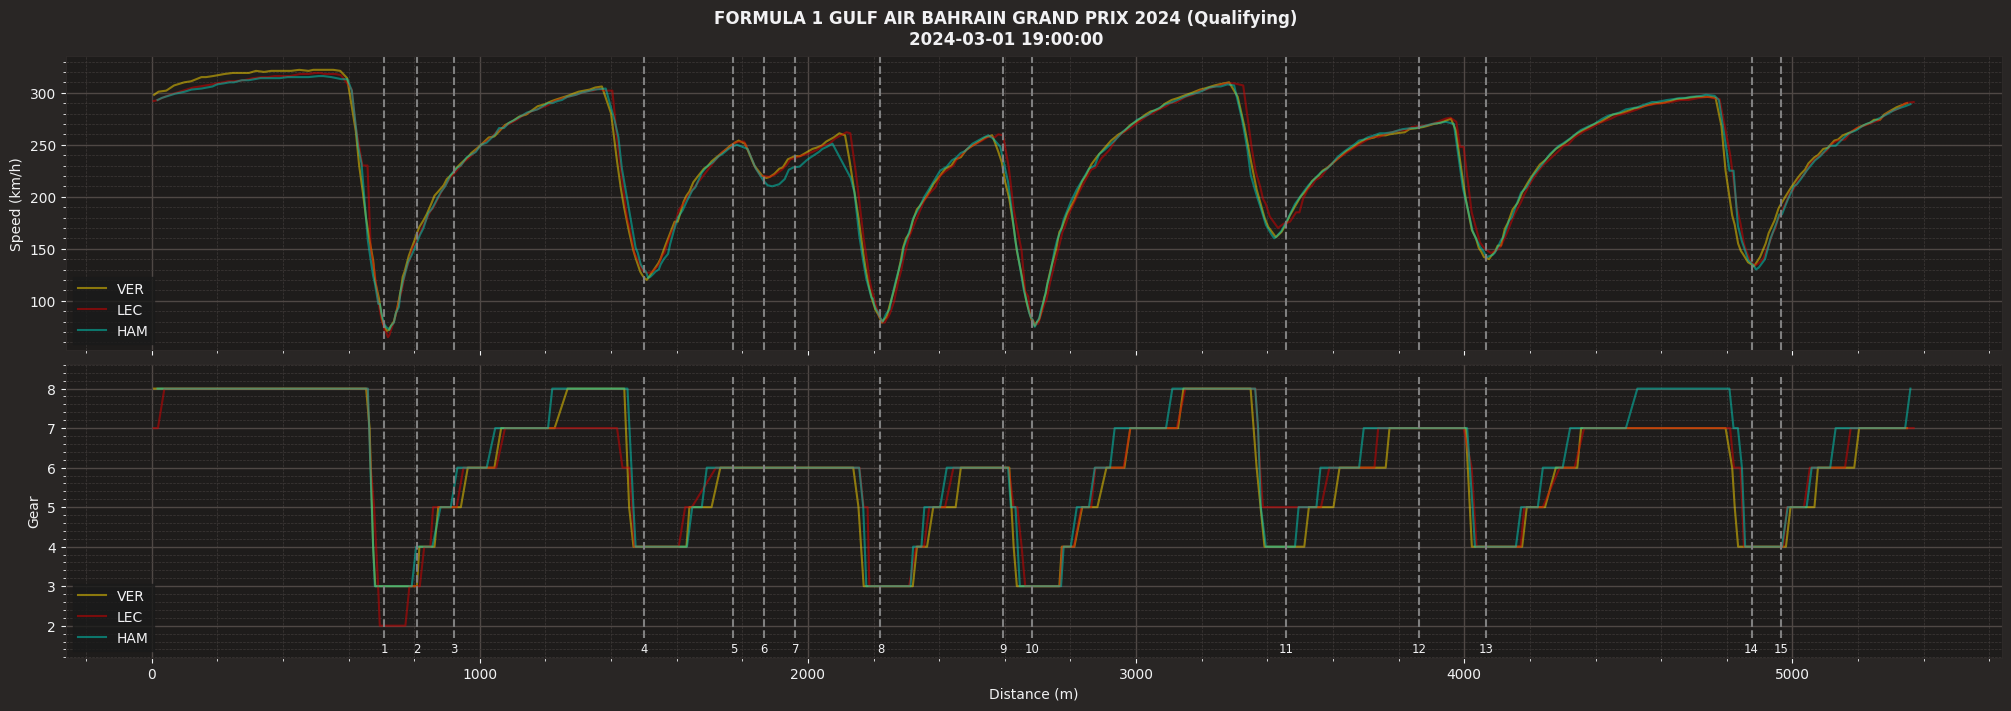

In [107]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 7), constrained_layout=True, sharex=True)
for driver in drivers_list:
    axes[0].plot(tel_df[driver]['Distance'], tel_df[driver]['Speed'], color=driver_colour_mapping[driver], label=driver, alpha=0.5)
    axes[1].plot(tel_df[driver]['Distance'], tel_df[driver]['nGear'], color=driver_colour_mapping[driver], label=driver, alpha=0.5)
ax1_ylim = axes[1].get_ylim()
for _, corner in circuit_info.corners.iterrows():
    corner_txt = f"{corner['Number']}{corner['Letter']}"
    axes[0].axvline(corner['Distance'], color='grey', linestyle='--')
    axes[1].vlines(corner['Distance'], ymin=ax1_ylim[0], ymax=ax1_ylim[1], color='grey', linestyle='--')
    axes[1].text(corner['Distance'], ax1_ylim[0] * 0.85, corner_txt, va='center_baseline', ha='center', size='small')
axes[1].set_ylim(ax1_ylim[0] * 0.7, None)
axes[0].set_ylabel('Speed (km/h)')
axes[1].set_ylabel('Gear')
axes[1].set_xlabel('Distance (m)')
for ax in axes:
    ax.legend(loc='lower left')
fig_title = f"{session.session_info['Meeting']['OfficialName']} ({session.session_info['Type']})\n{session.session_info['StartDate']}"
fig.suptitle(fig_title, fontweight='bold')

In [98]:
ax1_ylim

(1.7, 8.3)

In [ ]:
w

In [80]:
circuit_info.corners

,X,Y,Number,Letter,Angle,Distance
0,42.405939,8329.202564,1,,-246.615311,708.060978
1,820.781621,7879.043841,2,,-101.177469,809.362397
2,1912.969997,8065.442167,3,,-261.394562,921.305992
3,7487.745293,6790.710716,4,,-349.599066,1499.507455
4,5820.228443,4860.740936,5,,-211.501597,1772.563334
5,5180.404121,4214.598861,6,,-76.374442,1865.747082
6,4276.202937,4156.240631,7,,-258.953372,1961.823843
7,2490.099011,2458.600397,8,,-114.654309,2220.817930
8,2711.155288,5950.242339,9,,-344.907956,2593.741286
9,2100.132716,6613.999851,10,,-270.022000,2682.887707
